# FoldAR
##### Ian Brown, Tani Cath, Tom Cavey
##### Colorado State University
##### CS567 3D User Interfaces

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [35]:
finger_columns = ['thumbTip', 'thumbIP', 'thumbMP', 'thumbCMC', 'thumbTip2', 'thumbIP2', 'thumbMP2', 'thumbCMC2',
                  'indexTip', 'indexPIP', 'indexDIP', 'indexMCP', 'indexTip2', 'indexPIP2', 'indexDIP2', 'indexMCP2',
                  'middleTip', 'middlePIP', 'middleDIP', 'middleMCP', 'middleTip2', 'middlePIP2', 'middleDIP2', 'middleMCP2',
                  'ringTip', 'ringPIP', 'ringDIP', 'ringMCP', 'ringTip2', 'ringPIP2', 'ringDIP2', 'ringMCP2',
                  'littleTip', 'littlePIP', 'littleDIP', 'littleMCP', 'littleTip2', 'littlePIP2', 'littleDIP2', 'littleMCP2']


In [133]:
def findCentroid(xList, yList):
    xCenter = (xList[0] + xList[-1])/2
    yCenter = (yList[0] + yList[-1])/2
        
    return np.array([xCenter, yCenter])

def getCMCs(frame:pd.DataFrame):
    X1s = [frame['thumbCMC.x'].iloc[0], frame['littleMCP.x'].iloc[0]]
    Y1s = [frame['thumbCMC.y'].iloc[0], frame['littleMCP.y'].iloc[0]]
    X2s = [frame['thumbCMC2.x'].iloc[0], frame['littleMCP2.x'].iloc[0]]
    Y2s = [frame['thumbCMC2.y'].iloc[0], frame['littleMCP2.y'].iloc[0]]
    
    return [X1s, Y1s, X2s, Y2s]
    


Frame 5 (2023-11-08 19:10:00.166000):


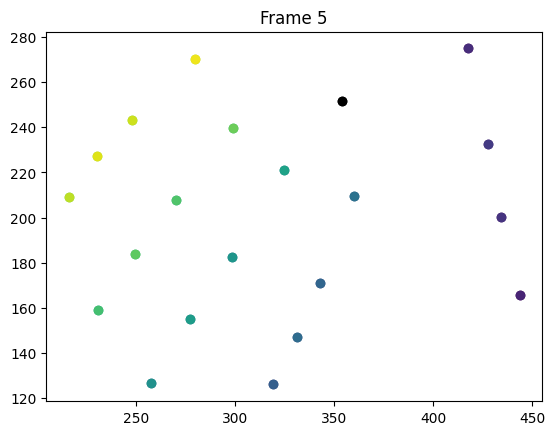


Frame 10 (2023-11-08 19:10:03.528000):


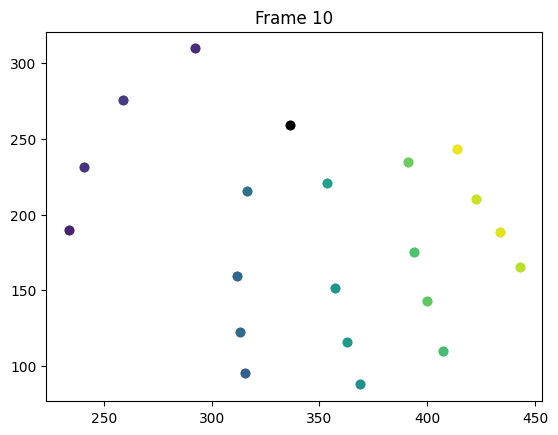


Frame 15 (2023-11-08 19:10:05.138000):


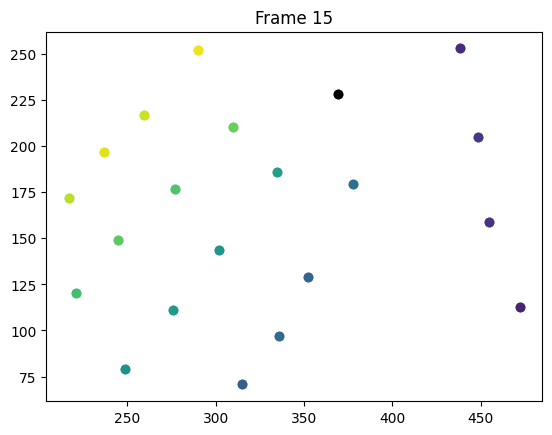


Frame 20 (2023-11-08 19:10:07.458000):


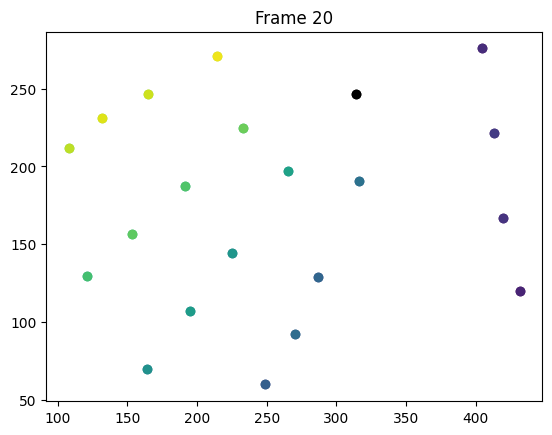


Frame 25 (2023-11-08 19:10:08.263000):


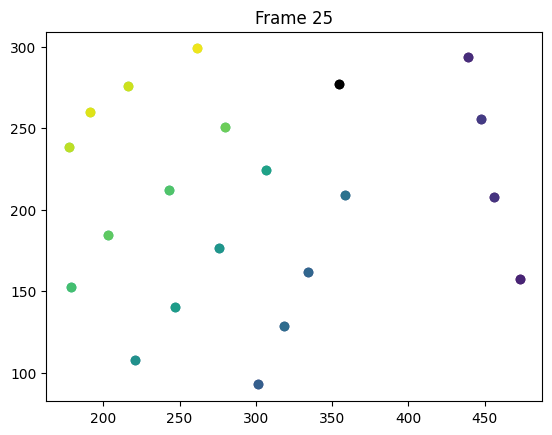


Frame 30 (2023-11-08 19:10:09.151000):


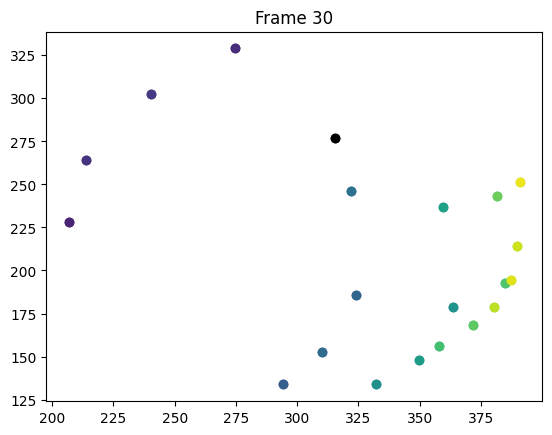


Frame 35 (2023-11-08 19:10:09.988000):


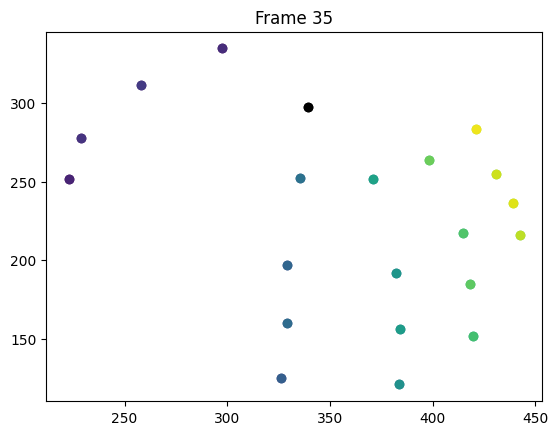


Frame 40 (2023-11-08 19:10:10.674000):


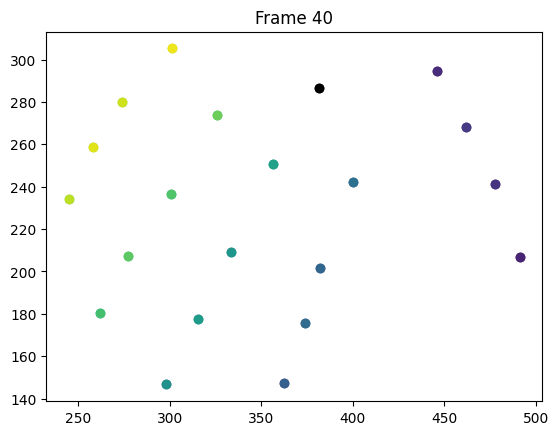


Frame 45 (2023-11-08 19:10:11.394000):


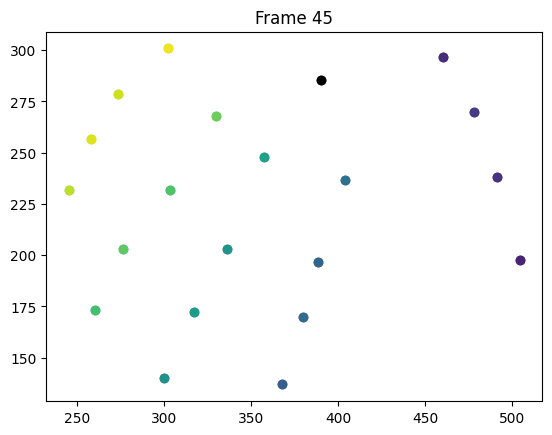


Frame 50 (2023-11-08 19:10:12.569000):


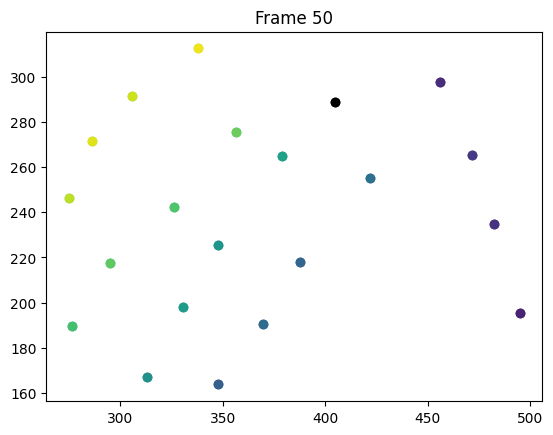


Frame 55 (2023-11-08 19:10:13.871000):


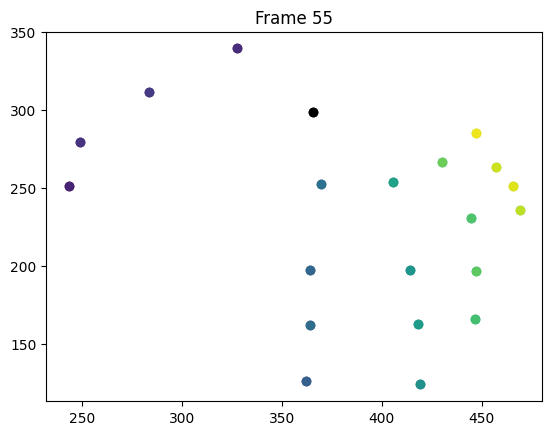

In [143]:
df = pd.read_csv('Data/sessionData-someone-0.csv')

# stripping spaces from columns an data...
df.columns = df.columns.str.strip()
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

# check columns are stripped
# print(df.columns)

# finger_columns = ['thumbTip.x', 'thumbTip.y', 'thumbIP.x', 'thumbIP.y', 'thumbMP.x', 'thumbMP.y', 'thumbCMC.x', 'thumbCMC.y',
#                   'thumbTip2.x', 'thumbTip2.y', 'thumbIP2.x', 'thumbIP2.y', 'thumbMP2.x', 'thumbMP2.y', 'thumbCMC2.x', 'thumbCMC2.y',
#                   'indexTip.x', 'indexTip.y', 'indexPIP.x', 'indexPIP.y', 'indexDIP.x', 'indexDIP.y', 'indexMCP.x', 'indexMCP.y',
#                   'indexTip2.x', 'indexTip2.y', 'indexPIP2.x', 'indexPIP2.y', 'indexDIP2.x', 'indexDIP2.y', 'indexMCP2.x', 'indexMCP2.y',
#                   'middleTip.x', 'middleTip.y', 'middlePIP.x', 'middlePIP.y', 'middleDIP.x', 'middleDIP.y', 'middleMCP.x', 'middleMCP.y',
#                   'middleTip2.x', 'middleTip2.y', 'middlePIP2.x', 'middlePIP2.y', 'middleDIP2.x', 'middleDIP2.y', 'middleMCP2.x', 'middleMCP2.y',
#                   'ringTip.x', 'ringTip.y', 'ringPIP.x', 'ringPIP.y', 'ringDIP.x', 'ringDIP.y', 'ringMCP.x', 'ringMCP.y',
#                   'ringTip2.x', 'ringTip2.y', 'ringPIP2.x', 'ringPIP2.y', 'ringDIP2.x', 'ringDIP2.y', 'ringMCP2.x', 'ringMCP2.y',
#                   'littleTip.x', 'littleTip.y', 'littlePIP.x', 'littlePIP.y', 'littleDIP.x', 'littleDIP.y', 'littleMCP.x', 'littleMCP.y',
#                   'littleTip2.x', 'littleTip2.y', 'littlePIP2.x', 'littlePIP2.y', 'littleDIP2.x', 'littleDIP2.y', 'littleMCP2.x', 'littleMCP2.y']



# for each frame in dataframe
for i, frame in df.groupby('frame'):
    timestamp_datetime = datetime.strptime(frame['date'].iloc[0]+ " " +frame['time'].iloc[0], '%Y-%m-%d %H:%M:%S.%f')
          
    # # Euclidean distances between points
    # distances = np.sqrt((frame[finger_columns].diff(axis=1, periods=2)[::2]**2 +
    #                      frame[finger_columns].diff(axis=1, periods=2)[1::2]**2).values)

    # calc statistics for each frame
    # frame_mean = np.mean(distances)
    # frame_min = np.min(distances[distances > 0])
    # frame_max = np.max(distances)
    # frame_std = np.std(distances)

    plt.figure(i)
    plt.title(f'Frame {i}')

    for j, finger in enumerate(finger_columns):
        color = plt.cm.viridis(j / len(finger_columns))
        plt.plot(frame[f"{finger}.x"], frame[f"{finger}.y"], 'o', label=finger, color=color)

    CMCs = getCMCs(frame)
    centroid1 = findCentroid(CMCs[0], CMCs[1])
    plt.plot(centroid1[0], centroid1[1], 'o', label='palm', color='black')

    centroid2 = findCentroid(CMCs[2], CMCs[3])
    plt.plot(centroid2[0], centroid2[1], 'o', label='palm2', color='black')

    print(f'Frame {i} ({timestamp_datetime}):')
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    
    plt.show()
    
    # print(f'Mean Distance: {frame_mean:.2f}')
    # print(f'Minimum Distance: {frame_min:.2f}')
    # print(f'Maximum Distance: {frame_max:.2f}')
    # print(f'Standard Deviation: {frame_std:.2f}')
    print()
